# To-do
- plot graphs as shown in text book
- do softmax
- do early stopping
- comment code with latex equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
data_iris = load_iris() 
X_raw = data_iris.data
X = np.c_[np.ones((150,1)),X_raw]
y= np.array([0 if x == 0 else 1 for x in data_iris.target ])
y=np.reshape(y,(150,1))
obsv = len(y)
params = 5

In [19]:
data_iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
print(data_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

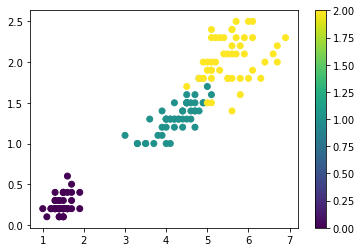

In [29]:
plt.scatter(X[:,3],X[:,4],c=data_iris.target)
plt.colorbar()
plt.show()

In [30]:
def compute_ws(input_features,weights):
    return input_features@weights

def predict_probability(weighted_sum):
    return 1/(1+np.exp(-weighted_sum))

def predict_class(probability,threshold):
    y_hat_function = lambda x: 1 if x >=threshold else 0
    y_hat = [y_hat_function(x) for x in probability ]
    return y_hat

def cost_function(input_features,weights):
    ws = compute_ws(input_features,weights)
    p = predict_probability(ws)
    cost_function = ((-y.T@np.log(p))+((y-1).T@np.log(1-p)))/obsv
    cost_function_history.append(list(cost_function.flatten()))

def compute_Batch_GradientDescent(input_features,weights,y):
    ws = compute_ws(input_features,weights)
    p = predict_probability(ws)
    gradients = ((p-y).T@X)/obsv
    return gradients

def update_weights(gradients,learning_rate,weights):
    gradients = np.reshape(gradients,(5,1))
    weights -= learning_rate*gradients
    return weights

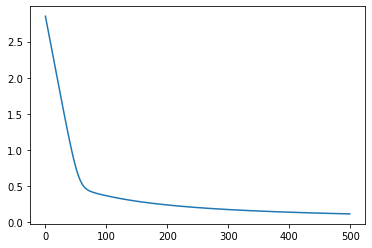

In [36]:
epoch = 500
cost_function_history = []
np.random.seed(42)
theta = np.random.rand(5,1)
for i in range(epoch):
    ws = compute_ws(X,theta)
    p = predict_probability(ws)
    y_hat = predict_class(p,0.5)
    cost_function(X,theta)
    gradients = compute_Batch_GradientDescent(X,theta,y)
    theta = update_weights(gradients,0.01,theta)
plt.plot(range(epoch),cost_function_history)
plt.show()

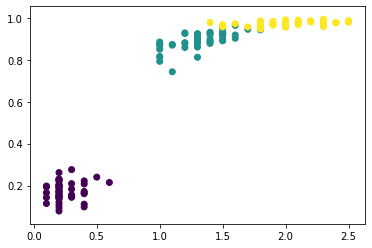

In [46]:
plt.scatter(data_iris.data[:,3],p,c=data_iris.target)
plt.show()

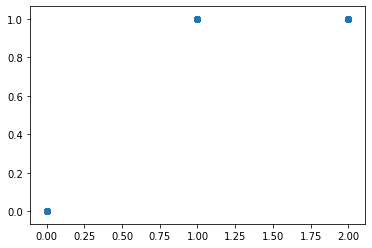

In [48]:
plt.scatter(data_iris.target,y_hat)